In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def plot_genes(fname,rows,savename,image_format):
    df = pd.read_csv(fname,sep="\t")
    df = df.loc[df["gene_ID"].isin(rows)]
    times = np.asarray([float(t) for t in df.columns[1:]])
    vals = {v[0] : [float(t) for t in v[1:]] for v in df.values}
    for l,s in vals.items():
        plt.plot(times,s,label=l)
    plt.legend()
    plt.savefig(savename,dpi=300, format=image_format,bbox_inches='tight')
    plt.show()

def plot_genes_specify_colors_normalize(fname,rows,savename,image_format,xlim=None):
    df = pd.read_csv(fname,sep="\t",comment="#")
    df = df.loc[df["gene_ID"].isin(rows)]
    times = np.asarray([float(t) for t in df.columns[1:]])
    vals = {v[0] : [(float(t)-min(v[1:]))/(max(v[1:])-min(v[1:])) for t in v[1:]] for v in df.values}
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    colors = colors[:3]+colors[4:]  #skip red for red/green colorblindness
    plt.gca().set_prop_cycle(color = colors)
    for l,s in sorted(vals.items()):
        plt.plot(times,s,label=l)
    plt.legend(loc="upper right")
    if xlim:
        plt.xlim(xlim[0],xlim[1])
    plt.savefig(savename,dpi=300, format=image_format,bbox_inches='tight')
    plt.show()


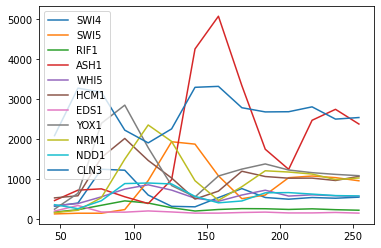

In [3]:
fname = "orlando2008_WildType_r1_trunc.tsv"
rows = ["SWI4","YOX1","NRM1","CLN3","WHI5","HCM1","NDD1","SWI5","ASH1","EDS1","RIF1"]
savename = "rep1.jpg"
plot_genes(fname,rows,savename,"jpg")

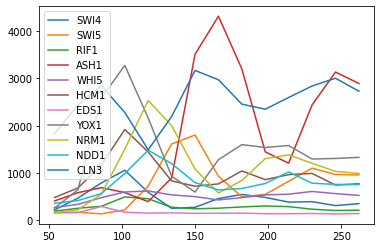

In [4]:
fname = "orlando2008_WildType_r2_trunc.tsv"
rows = ["SWI4","YOX1","NRM1","CLN3","WHI5","HCM1","NDD1","SWI5","ASH1","EDS1","RIF1"]
savename = "rep2.jpg"
plot_genes(fname,rows,savename,"jpg")

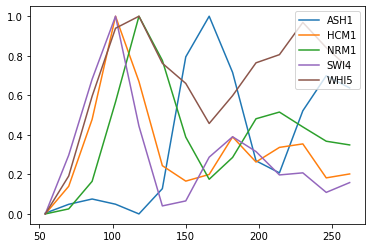

In [5]:
fname = "orlando2008_WildType_r2_trunc.tsv"
rows = ["ASH1","HCM1","NRM1","SWI4","WHI5"]
savename = "rep2_subset.pdf"
plot_genes_specify_colors_normalize(fname,rows,savename,"pdf")

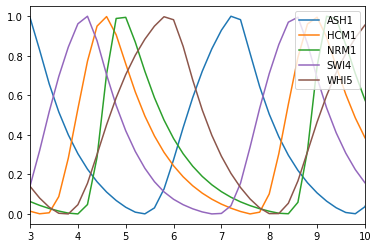

In [7]:
fname = "../sim_top_network/results_20220726/data_p2.tsv"
rows = ["ASH1","HCM1","NRM1","SWI4","WHI5"]
savename = "sim.pdf"
plot_genes_specify_colors_normalize(fname,rows,savename,"pdf",xlim=[3,10])